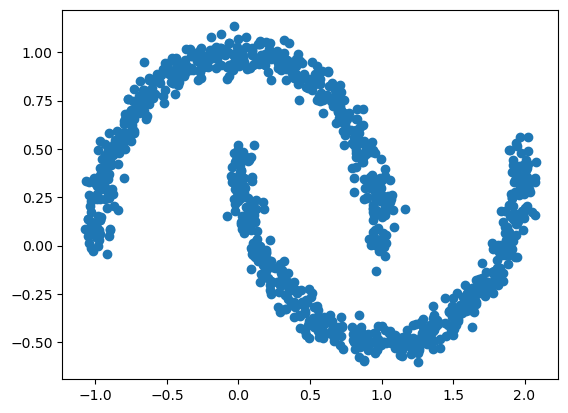

In [1]:
#GMM for Generating New Data:
# Case-1: Density Estimation
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(1000, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);


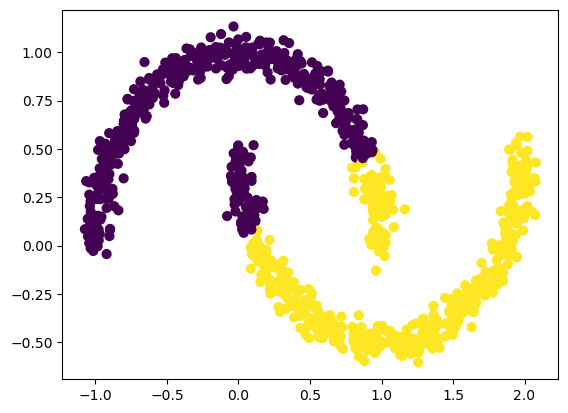

In [2]:
#Apply GMM
#Applying GMM:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

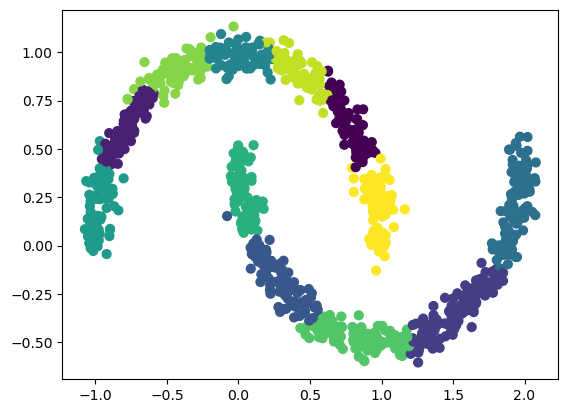

In [3]:
#Apply GMM
#Applying GMM:
from sklearn.mixture import GaussianMixture as GMM
gmm12 = GMM(n_components=12)
gmm12.fit(X)
labels = gmm12.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

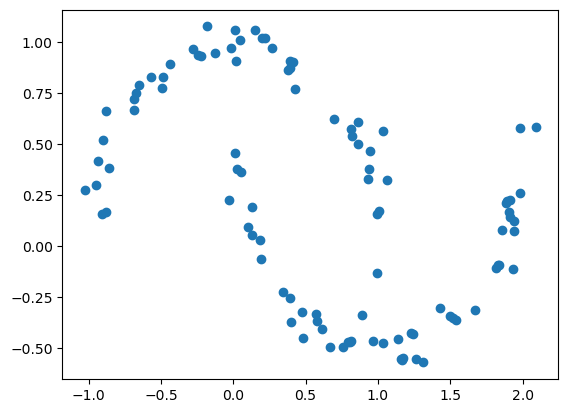

In [4]:
#Here the mixture of 12 Gaussians serves not to find separated clusters of data, but rather to model 
#the overall distribution of the input data. This is a generative model of the distribution, meaning 
#that the GMM gives us the recipe to generate new random data distributed similarly to our input. 
#For example, let's 100 new points drawn from this 12-component GMM fit to our original data:

Xnew = gmm12.sample(100)
Xnew=Xnew[0]
plt.scatter(Xnew[:, 0], Xnew[:, 1]);

In [5]:
###Real Example:we willgenerate new handwritten digits from the standard digits corpus that we have used before.
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

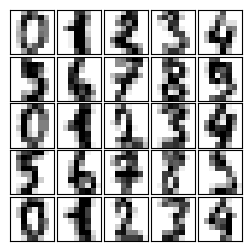

In [6]:
def plot_digits(data):
    fig, ax = plt.subplots(5, 5, figsize=(3, 3),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

In [11]:
#CLuster the data:
gmm = GMM(10, covariance_type='full')
gmm.fit(data)
print(gmm.converged_)

True


In [12]:
#Generating 100 new points:
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

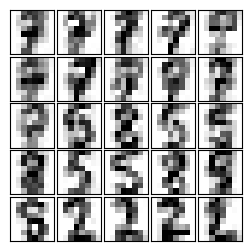

In [13]:
#Applying inverse-PCA and plotting the data:
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)